In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hand-1-17/test/7/1075.jpg
/kaggle/input/hand-1-17/test/7/1031.jpg
/kaggle/input/hand-1-17/test/7/1024.jpg
/kaggle/input/hand-1-17/test/7/1161.jpg
/kaggle/input/hand-1-17/test/7/1009.jpg
/kaggle/input/hand-1-17/test/7/1157.jpg
/kaggle/input/hand-1-17/test/7/1173.jpg
/kaggle/input/hand-1-17/test/7/1167.jpg
/kaggle/input/hand-1-17/test/7/1154.jpg
/kaggle/input/hand-1-17/test/7/1124.jpg
/kaggle/input/hand-1-17/test/7/915.jpg
/kaggle/input/hand-1-17/test/7/1055.jpg
/kaggle/input/hand-1-17/test/7/1026.jpg
/kaggle/input/hand-1-17/test/7/1162.jpg
/kaggle/input/hand-1-17/test/7/930.jpg
/kaggle/input/hand-1-17/test/7/1010.jpg
/kaggle/input/hand-1-17/test/7/1025.jpg
/kaggle/input/hand-1-17/test/7/1058.jpg
/kaggle/input/hand-1-17/test/7/1166.jpg
/kaggle/input/hand-1-17/test/7/1101.jpg
/kaggle/input/hand-1-17/test/7/1097.jpg
/kaggle/input/hand-1-17/test/7/988.jpg
/kaggle/input/hand-1-17/test/7/1129.jpg
/kaggle/input/hand-1-17/test/7/1144.jpg
/kaggle/input/hand-1-17/test/7/944.jpg
/kag

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout
from keras.regularizers import l2
from keras.regularizers import l1

from sklearn.utils import shuffle
from PIL import Image
from tensorflow.keras import regularizers

In [4]:
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19']
y_train = []
x_train = []
path = "/kaggle/input/hand-1-17/test"
for i in os.listdir(path):
    for j in os.listdir(path + "/" + i):
        im =  Image.open(path + "/" + i + '/' + j)
        im = im.resize((240,200),Image.LANCZOS)
        im = np.array(im)
        im = np.expand_dims(im,axis = 2)
        x_train.append(im)
        y_train.append(labels.index(i))

In [5]:
x = np.array(x_train)
y = to_categorical(y_train)
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.80, random_state = 42)

In [6]:
print(x.shape)
print(y.shape)

(6000, 200, 240, 1)
(6000, 20)


In [7]:
# Define the CNN model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 240, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into the fully connected layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))  # Adding dropout for regularization

model.add(Dense(len(labels), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32)

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 238, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 119, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 117, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 58, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 28, 128)       0

In [8]:
# Save the entire model to a HDF5 file
model.save('hand_model.h5')


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Save the model in the native Keras format
model.save('hand_model.keras')


38/38 [==============================] - 1s 11ms/step


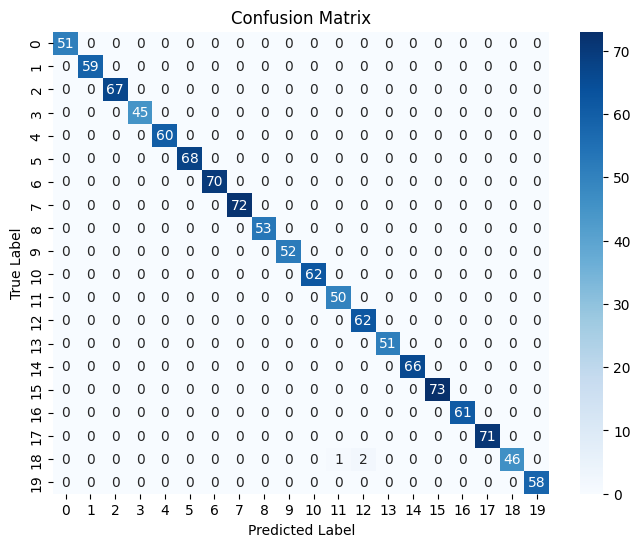

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_val' contains the true labels for the validation set, and 'predictions' contains the model's predictions

# Convert probability predictions to binary predictions
binary_predictions = (model.predict(x_val) > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_val.argmax(axis=1), binary_predictions.argmax(axis=1))

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], yticklabels= ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()